## Assignment for Week 6 - K-Means and Hierarchical Clustering

### Exercise:
#### KMeans and Hierarchial Clustering

Collect data from twitter using your choice of hashtag (at least 1000 tweets). 
To gather your Twitter data, I would recommend using the python library tweepy.<br>
Note: Reddit data can be used instead of Twitter data for this assignment.

- You will use both K-Means and HCA to cluster the collected data
- Draw a dendrogram
- Identify number of optimum clusters, and justify how do you pick number of clusters
- List the top 10 most frequent words
- Visualize using wordclouds
- Summarize your findings

### Deliverables:

Upload your notebook's .ipynb file.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [16]:
import json 
import tweepy 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# For Dendrogram
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm_notebook, trange

In [17]:
def api_connection(): 
    file = pd.read_csv('./auth/apikeys.csv', encoding='utf-8')
    token = tweepy.OAuth2BearerHandler("")
    api = tweepy.API(token) 
    return api

In [19]:
# Python Script to Extract tweets of a
# particular Hashtag using Tweepy and Pandas

## SOURCE -- https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/

# function to perform data extraction
def scrape(words, date_since, numtweet):

        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=[
            'username',
            'description',
            'location',
            'following',
            'followers',
            'totaltweets',
            'retweetcount',
            'text',
            'hashtags'])

        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
        tweets = tweepy.Cursor(
            api.search_tweets, words, lang="en",
            since_id=date_since, tweet_mode='extended'
        ).items(numtweet)


        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
        list_tweets = [tweet for tweet in tweets]

        # Counter to maintain Tweet Count
        i = 1
    
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
            username = tweet.user.screen_name
            description = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']

            # Retweets can be distinguished by
            # a retweeted_status attribute,
            # in case it is an invalid reference,
            # except block will be executed
            try:
                text = tweet.retweeted_status.full_text
            except AttributeError:
                text = tweet.full_text
            
            hashtext = list()
            for j in trange(len(hashtags)):
                hashtext.append(hashtags[j]['text'])

                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description,
                            location, following,
                            followers, totaltweets,
                            retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
                i = i+1
                
        filename = 'scraped_tweets.csv'

        # we will save our database as a CSV file.
        db.to_csv(filename)

if __name__ == '__main__':

        api = api_connection()

        # Enter Hashtag and initial date
        print("Enter Twitter HashTag to search for")
        words = input()
        print("Enter Date since The Tweets are required in yyyy-mm--dd")
        date_since = input()

        # number of tweets you want to extract in one run
        numtweet = 1000
        scrape(words, date_since, numtweet)
        print('Scraping has completed!')


Enter Twitter HashTag to search for
fall
Enter Date since The Tweets are required in yyyy-mm--dd
2022-10-01


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.35it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.52it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 95.85it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 97.97it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 100.31it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 110.41it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 134.76it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 133.63it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 154.30it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 154.82it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 124.15it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 

Scraping has completed!


In [21]:
tweet_df = pd.read_csv('scraped_tweets.csv', index_col=0)
tweet_df.head()

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,amigothefriend_,دارم روش کار میکنم وقتی تموم شد بهت زنگ میزنم\...,NaN,382,449,4438,329,"The Dictators never apologize, they just fall ...",['مهسا_امینی']
1,introvertedChiq,#Arsenal,online,1004,914,2130,503,"If you fall in love with an #Aquarius, give th...",['Aquarius']
2,AllForGardening,NaN,NaN,6,402,45899,0,All For Gardening: Curly kale in the fall gard...,['GardeningFun']
3,olivealerts,"Advanced options strategies from Olive, in che...","New York, NY",0,390,20427,0,$TRGP Trade #options with simplicity and contr...,['options']
4,millionerica,The cute chubby girl next door. Im a stay at h...,NaN,4,9,16,0,Home grown pumpkins!!! #fall #fallseason #pump...,"['fall', 'fallseason', 'pumpkin', 'pumpkins', ..."


# K-Means Clustering

With tweets retrieved for the #music hashtag, I will use the K-Means algorithm with the elbow method to determine the optimal value for K, and plot the distances in a dendrogram. Prior to doing so, I'll analyze the Top 10 frequent words and populate a word cloud based upon the text. 

## Data Prep
Isolate tweets, remove stopwords, lemmatize, stem, and tokenize words using NLTK

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer # for vectorizing using TFIDF, allows K-Means to associate frequency
import re
from wordcloud import WordCloud

# SET STOPWORDS
stop = set(stopwords.words('english')) # stopwords

# LEMMATIZE
lemmatizer = WordNetLemmatizer()

# TOKENIZE
w_tokenizer = WhitespaceTokenizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rschr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rschr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
tweet_df['text'] = tweet_df['text'].str.lower() # set lowercase
tweet_df['text'] = tweet_df['text'].apply(lambda i: re.sub(r'[^\w\s]', '', i)) # Removing punctuations in string
tweet_df['text'] = tweet_df['text'].apply(lambda i: lemmatizer.lemmatize(i)) # lemmatize to set words to root
tweet_df['text'] = tweet_df['text'].apply(lambda i: " ".join(w_tokenizer.tokenize(i))) # tokenize to separate words 
tweet_df['text'] = tweet_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # drop stopwords

With a series of lambda functions applied to the text column, I had to: 

- Set words lowercase
- Remove punctuation
- Lemmatize, or set all words to their roots (ex. 'going' -> 'go')
- Tokenize, or create tokens of each word for encoding
- Drop all stopwords

# Analysis

Prior to clustering, we can look at the frequency of terms for the hashtag _#pumpkin_

fall        370
paper        88
art          73
october      65
classes      57
mandala      50
autumn       50
research     45
essay        44
love         39
dtype: int64


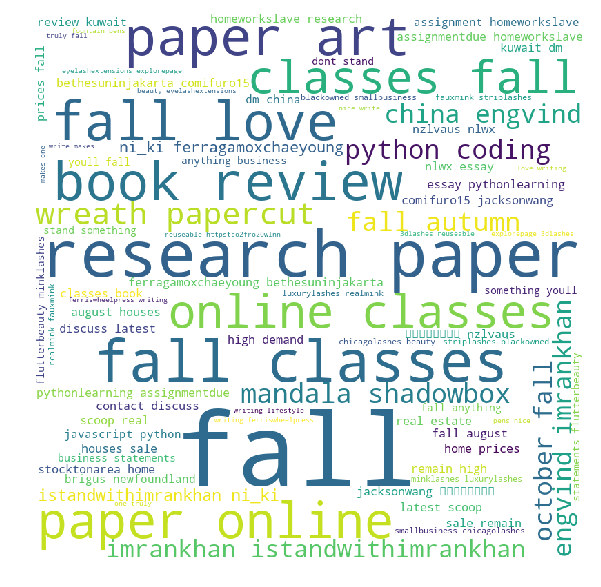

In [24]:
full_text = []
for i in tweet_df['text']: 
    words = i.split()
    for word in words: 
        full_text.append(word)
words = " ".join(full_text)

# Values
counts = pd.Series(full_text).value_counts()
print(counts.head(10)) 

# plot the WordCloud image   
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Building the Algorithm

I use the TF-IDF (Term Frequency and Inverse Document Frequency) vectorizer to fit the data, then train it upon `n` clusters for K and evaluate using the predictions, `y`. Determining the ideal amount of clusters is determined with the elbow method

In [25]:
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(tweet_df['text'])

sum_sq = []
for n in trange(2, 50):
    km = KMeans(n_clusters=n, random_state=42)
    km.fit(vectors)
    sum_sq.append(-km.score(vectors))

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:10<00:00,  1.47s/it]


[340.2342833833038,
 328.4004279257218,
 316.1683471121032,
 309.2402268453065,
 295.17457803705935,
 289.47880691177585,
 278.128590127798,
 269.42327909620053,
 260.70839453504135,
 253.21155296842358,
 244.20405390308238,
 238.4278245078726,
 236.62015149687582,
 222.60662980074156,
 214.02890736010397,
 213.96022237139806,
 204.6988070286647,
 200.24058897091714,
 193.43824908970674,
 184.88099886933324,
 181.87509248618016,
 174.78183335747784,
 171.42004642281466,
 170.94253235742718,
 163.59614613783094,
 159.34326070741835,
 156.52414626479637,
 154.34055080394327,
 147.69796994229142,
 146.1488064109017,
 142.61770981929988,
 140.34446088685866,
 136.60709019070293,
 133.84669332886625,
 130.91421509724205,
 126.43933085677737,
 122.13513110793214,
 121.76653408299885,
 117.60125686196294,
 115.38049657172343,
 111.13066534373111,
 108.96288552950449,
 105.44581189527241,
 105.79843928082921,
 101.14489126804268,
 98.86722407459519,
 94.37990157183113,
 92.59738630587965]

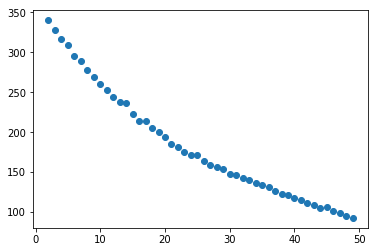

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(range(2, 50), sum_sq)
np.diff(sum_sq)
sum_sq

There doesn't appear to be a point at which the clusters score with less error on average, and the np.diff() plot is more scattered. 

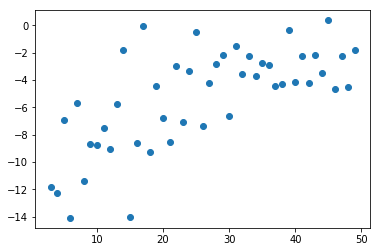

In [28]:
plt.scatter(range(3, 50), np.diff(sum_sq))

Given the assignment calls for isolated tweets and analyzing text, the clusters are determined by the frequency of terms. The data has a high dimensionality, and TFIDF appears to cluster by frequencies of terms in a way that sum of squares appears broad.

In [30]:
# PREDICTIONS
y = km.predict(vectors)
tweet_df['cluster'] = y

clusters_df = tweet_df[['text', 'hashtags', 'cluster']]
clusters_df.head()

,text,hashtags,cluster
0,dictators never apologize fall مهسا_امینی http...,['مهسا_امینی'],46
1,fall love aquarius give space amp never questi...,['Aquarius'],30
2,gardening curly kale fall garden gardeningfun ...,['GardeningFun'],21
3,trgp trade options simplicity control olive sc...,['options'],36
4,home grown pumpkins fall fallseason pumpkin pu...,"['fall', 'fallseason', 'pumpkin', 'pumpkins', ...",25


Based upon the predictions using quite a bit of clusters, I want to select the clusters with the most unique text to decide an optimal amount where the values tend to be grouped efficiently: 

In [37]:
clusters_df.groupby('cluster').nunique()

,text,hashtags,cluster
cluster,,,
0,1,1,1
1,1,1,1
2,3,3,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1


Right at 30 appears to have the most values, so I'll select 30 for K. 

In [51]:
kmeans = KMeans(n_clusters=30, random_state=42)
tf_idf = pd.DataFrame(data = vectors.toarray(), columns=vectorizer.get_feature_names())
kmeans.fit(tf_idf)


# PREDICTIONS
y = kmeans.predict(vectors)
tweet_df['cluster'] = y

clusters_df = tweet_df[['text', 'hashtags', 'cluster']]
clusters_df['cluster'].value_counts()

16    101
4      23
3      18
7      18
5      14
9      14
1      13
14     11
17     11
0      10
6       9
10      9
25      9
8       9
11      8
29      7
21      7
15      7
2       7
12      7
27      6
26      6
19      6
23      6
18      6
13      6
20      6
28      5
24      4
22      4
Name: cluster, dtype: int64

In [56]:
# TF IDF DATAFRAME
print("{} rows".format(tf_idf.shape[0]))
tf_idf.T.nlargest(5, 0)

367 rows


,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
apologize,0.497791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dictators,0.497791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
httpstcokvluitbshw,0.497791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
مهسا_امینی,0.497791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fall,0.093902,0.058592,0.064485,0.031489,0.071757,0.071757,0.071757,0.071757,0.071757,0.093902,...,0.044938,0.044938,0.037978,0.121265,0.036969,0.046285,0.059168,0.059168,0.059168,0.059168


# Cluster Analysis

In [48]:
# SOURCE -- https://nbviewer.org/github/LucasTurtle/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

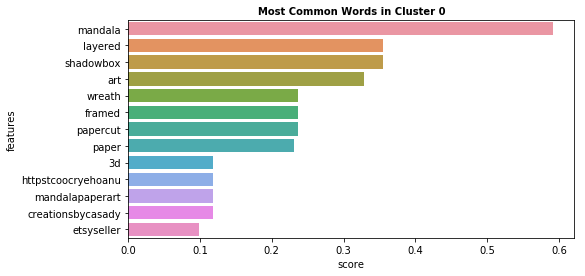

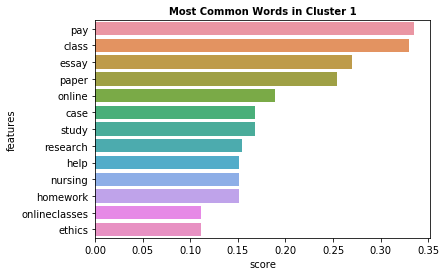

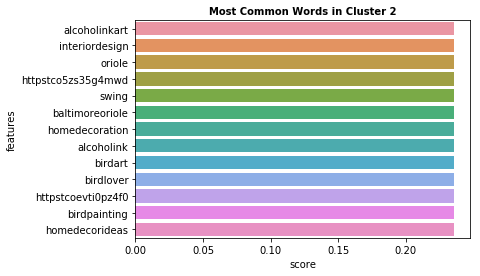

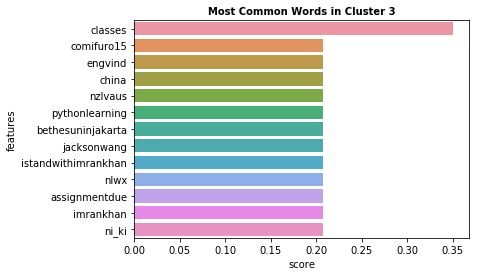

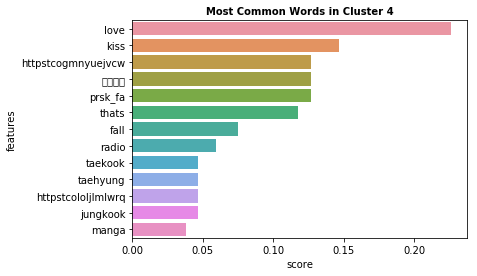

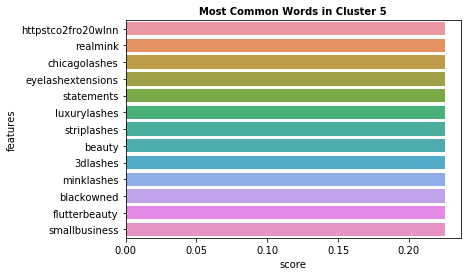

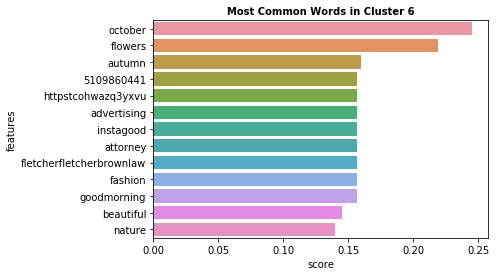

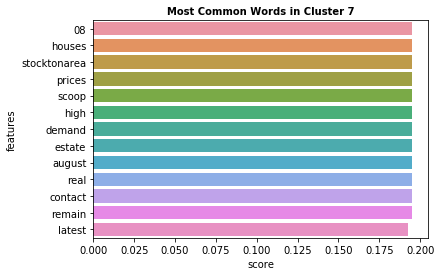

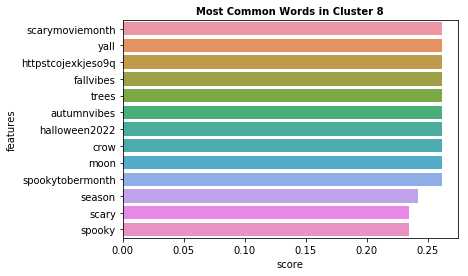

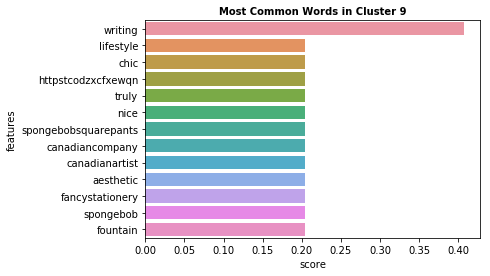

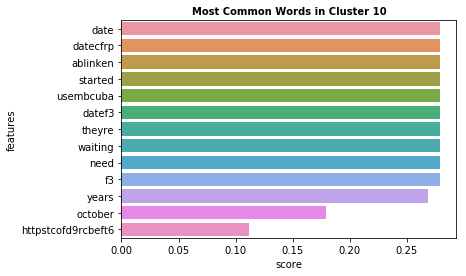

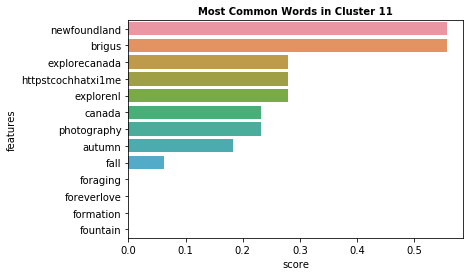

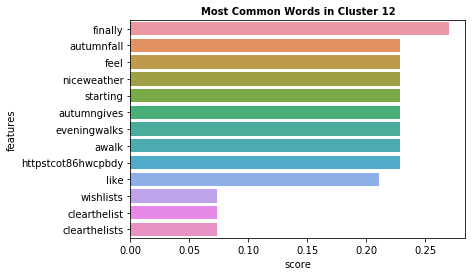

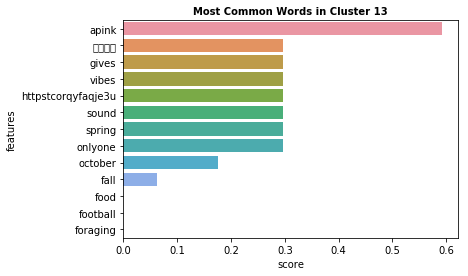

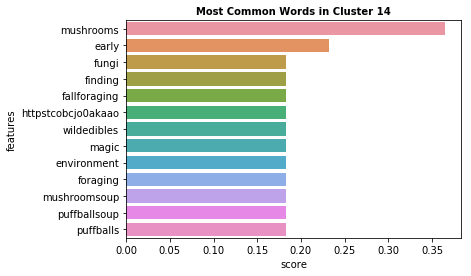

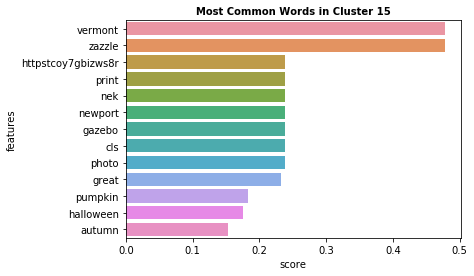

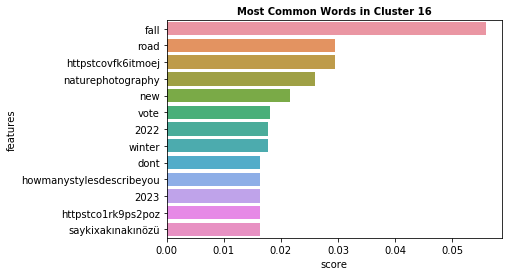

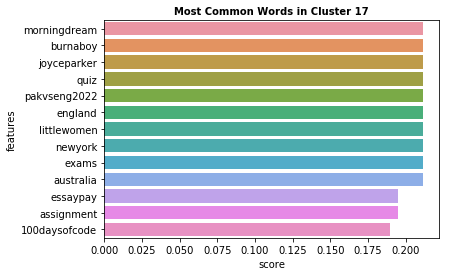

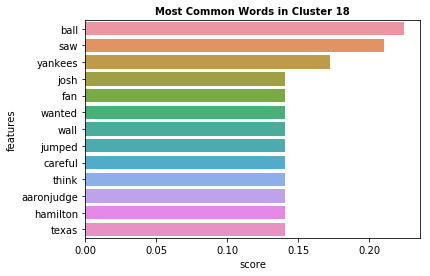

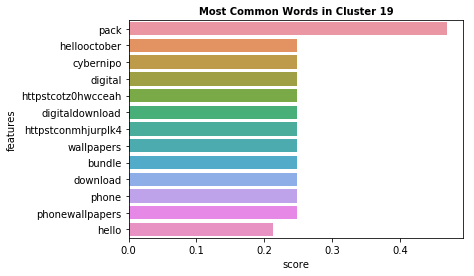

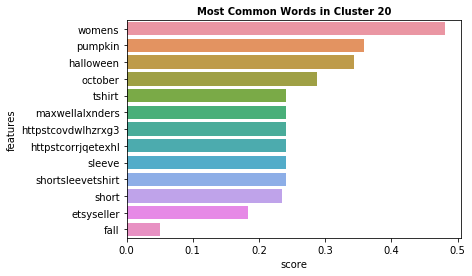

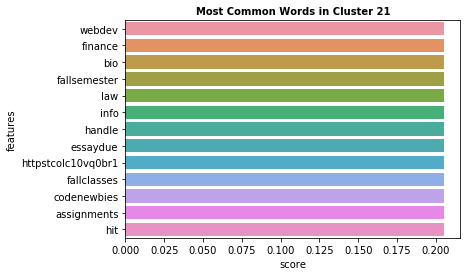

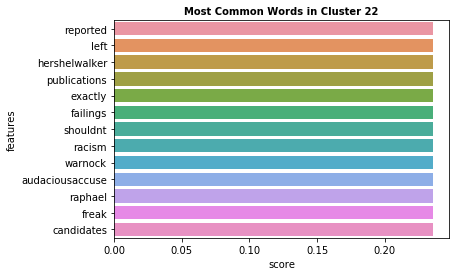

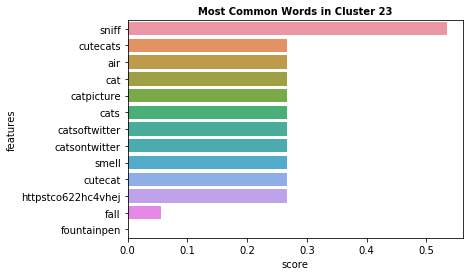

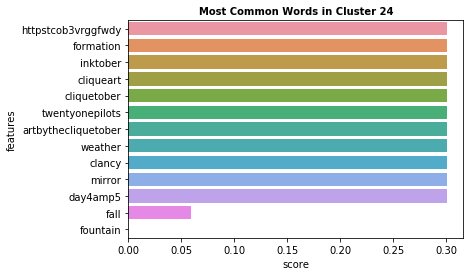

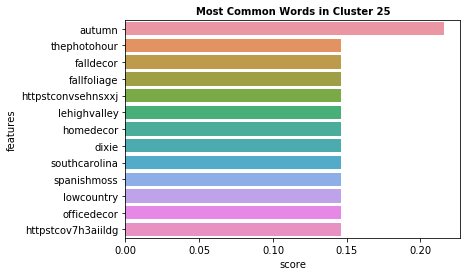

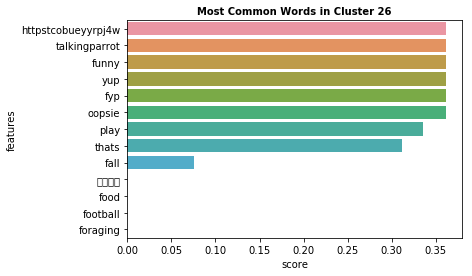

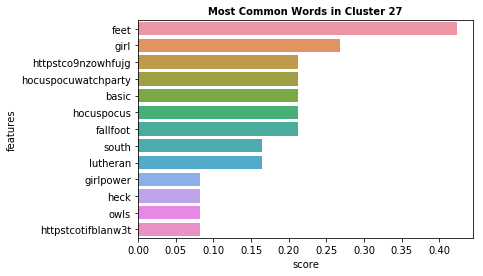

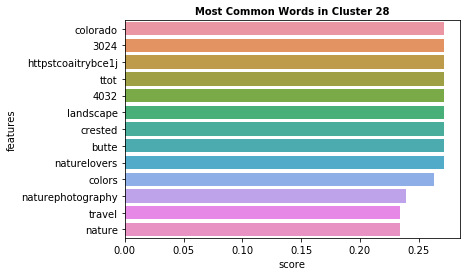

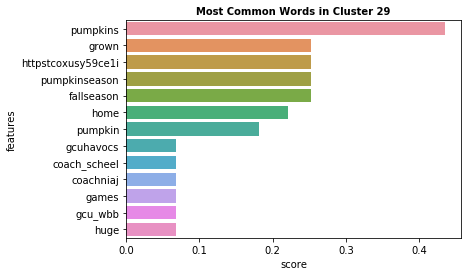

In [60]:
tf_idf_array = tf_idf.values
prediction = kmeans.predict(tf_idf)
n_feats = 20
dfs = get_top_features_cluster(tf_idf_array, prediction, n_feats)
plotWords(dfs, 13)


As seen the most common words relative to the hashtag are found in Cluster 29. 

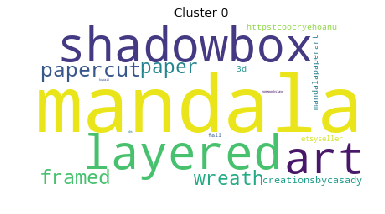

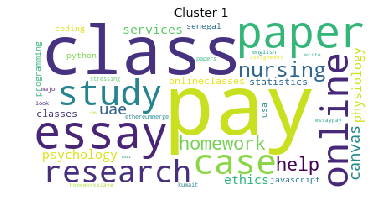

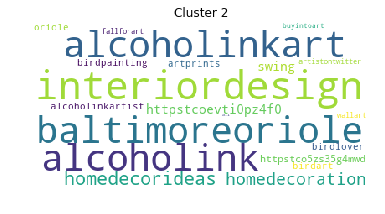

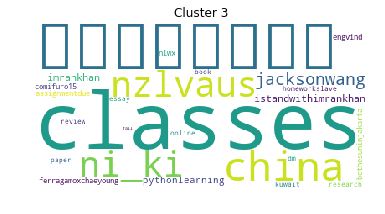

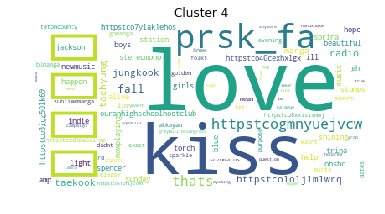

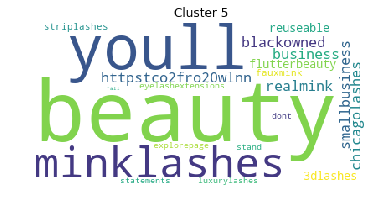

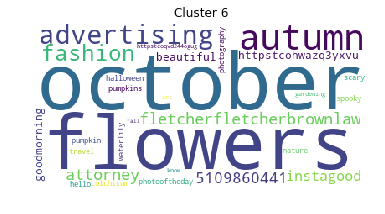

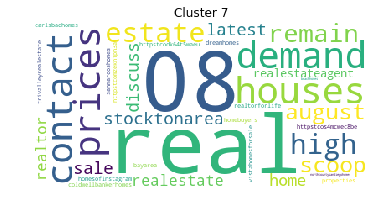

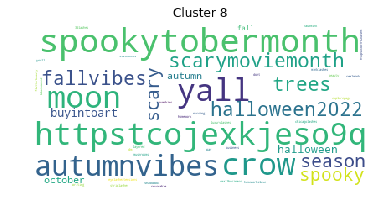

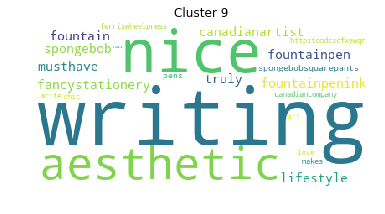

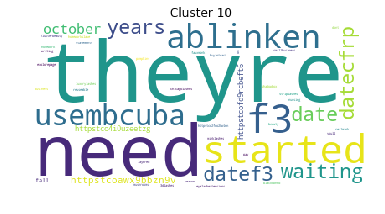

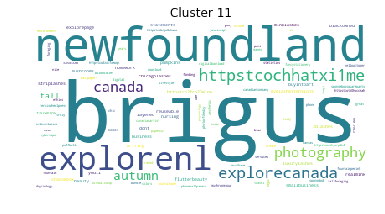

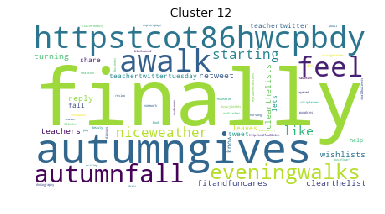

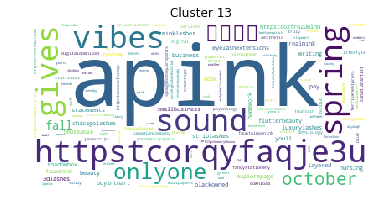

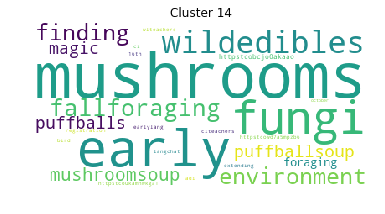

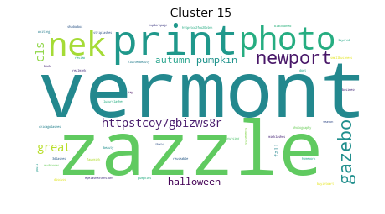

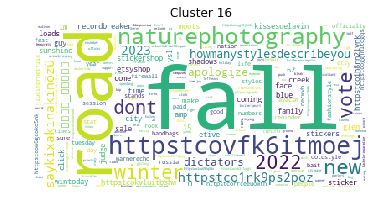

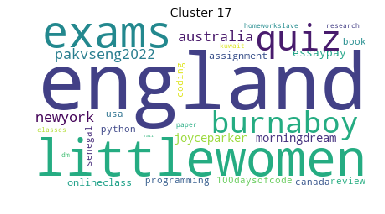

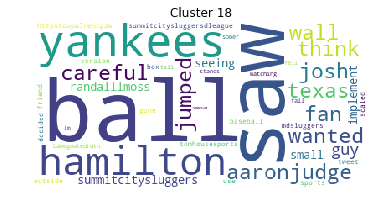

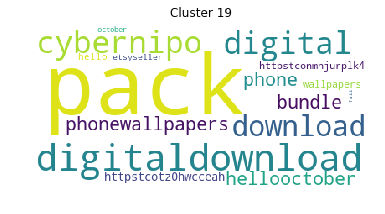

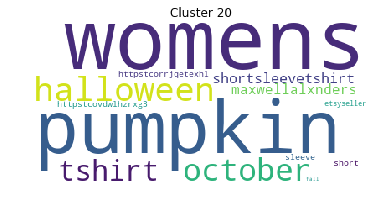

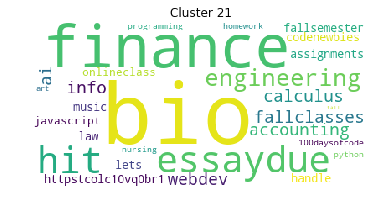

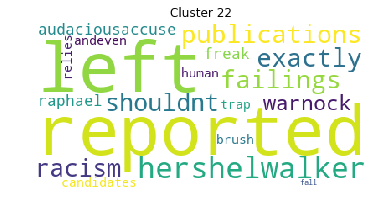

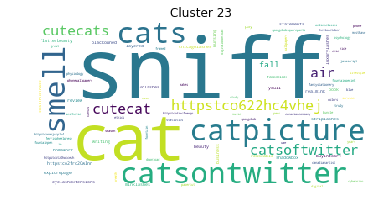

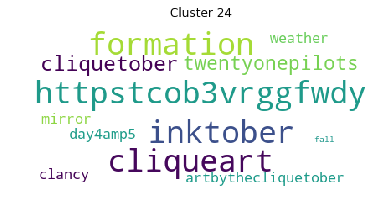

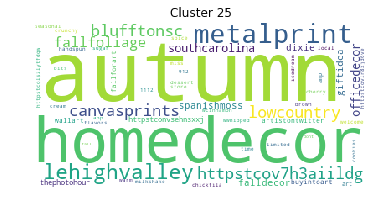

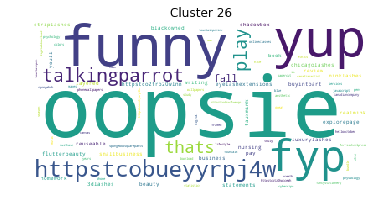

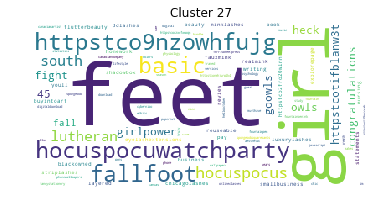

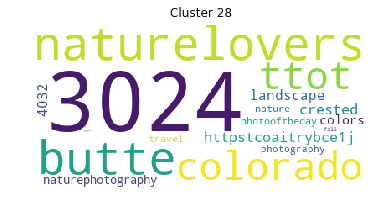

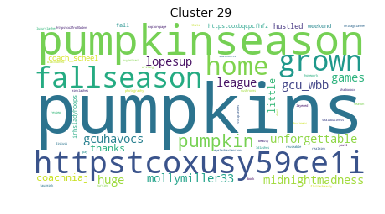

In [61]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = tf_idf.columns
generateWordClouds(centroids)

# Heirarchical Clustering (HCA)

While robust on many iterations, clustering with K-Means may take some time and arrive at the best clusters after a lengthy process of data transformation, dimensionality reduction, and vectorization. Heirarchical clustering works in a traversal path to decide the best cluster. 

In [73]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

cluster = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')  
cluster.fit_predict(tf_idf_array)

array([ 0,  0,  0,  0, 25, 25, 25, 25, 25,  0,  0,  0, 18, 18, 18, 18, 18,
       18, 24, 24, 24, 24, 24,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  6, 22, 22,  8,  8,  8,  8,  8,
        8,  8,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5, 26,  0,  0, 21, 21, 21,  0,  0,  0,  0,  0,
        0,  0,  0, 21, 21, 21,  0,  6,  0,  0,  0,  0,  0, 12, 12, 12, 12,
       12, 12, 12, 12, 12,  3,  3,  3, 20, 20, 20, 20, 20, 20, 19, 19, 19,
        0, 16, 16, 16, 16, 16, 16, 16,  3,  3,  3,  0,  3,  3,  3, 26, 17,
       17, 17, 17, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,
        0,  0,  0, 15, 15, 15, 15, 15, 15,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  0, 26, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27,  0,  0,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  0,  0,  0,  0,  0, 22, 22,  0,  0,
        1,  1,  1,  1,  1

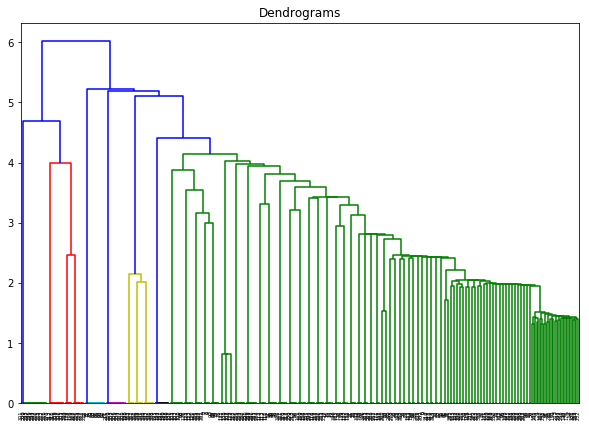

In [74]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(tf_idf, method='ward'))

In [75]:
dend

{'icoord': [[165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [115.0, 115.0, 134.6875, 134.6875],
  [105.0, 105.0, 124.84375, 124.84375],
  [95.0, 95.0, 114.921875, 114.921875],
  [85.0, 85.0, 104.9609375, 104.9609375],
  [75.0, 75.0, 94.98046875, 94.98046875],
  [65.0, 65.0, 84.990234375, 84.990234375],
  [55.0, 55.0, 74.9951171875, 74.9951171875],
  [45.0, 45.0, 64.99755859375, 64.99755859375],
  [35.0, 35.0, 54.998779296875, 54.998779296875],
  [25.0, 25.0, 44.9993896484375, 44.9993896484375],
  [15.0, 15.0, 34.99969482421875, 34.99969482421875],
  [5.0, 5.0, 24.999847412109375, 24.999847412109375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [235.0, 235.0, 254.375, 254.375],
  [225.0, 225.0, 244.6875, 244.6875],
  [215.0, 215.0, 234.84375, 234.84375],
  [205.0, 205.0, 224.921875, 2

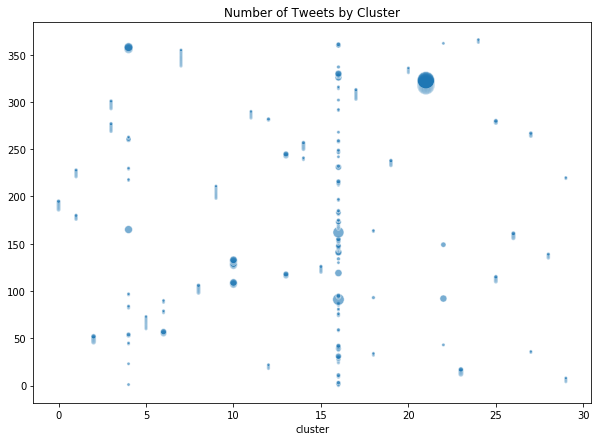

In [87]:
plt.figure(figsize=(10, 7))  
plt.title('Number of Tweets by Cluster')
sns.scatterplot(data=tweet_df, x="cluster", y=np.arange(len(tweet_df['cluster'])), size='totaltweets', alpha=.6, edgecolors='gray', legend=False, sizes=(10, 300))

# Conclusion

Plotting the clusters shows the decisions upon the words are made about 16 clusters into calculating distances, and the volume of tweets appears most abundant in later clusters past 20, constituting the cluster performance best around 30 clusters and the close assumptions to the #fall hashtag. 